Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration 77
Iteratio

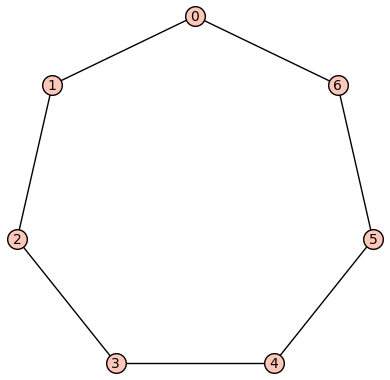

Graph 2:


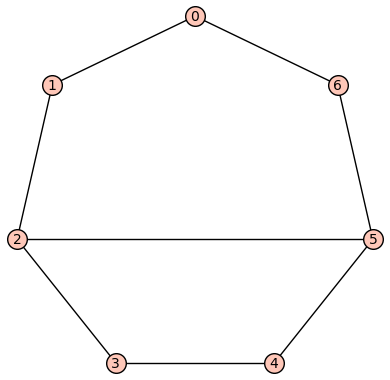

Graph 3:


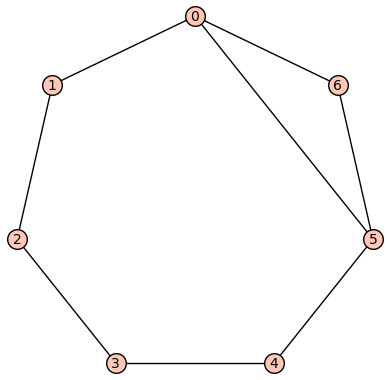

Graph 4:


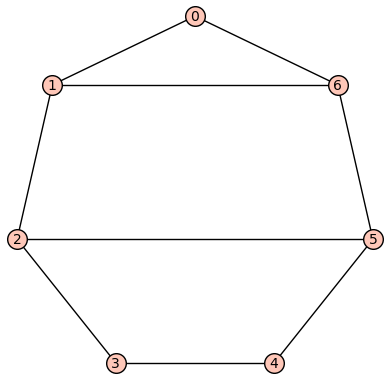

Graph 5:


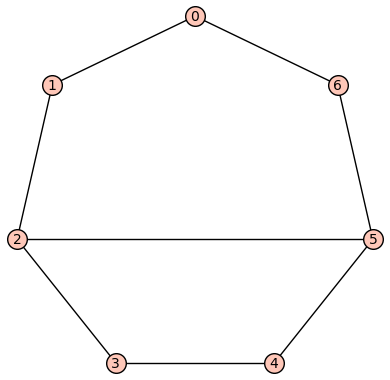

Graph 6:


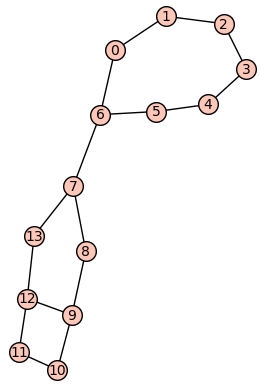

Graph 7:


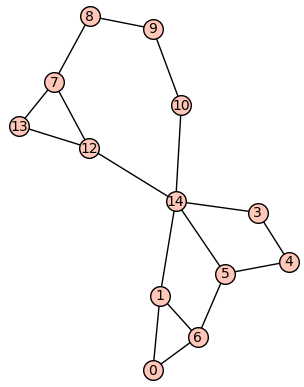

Graph 8:


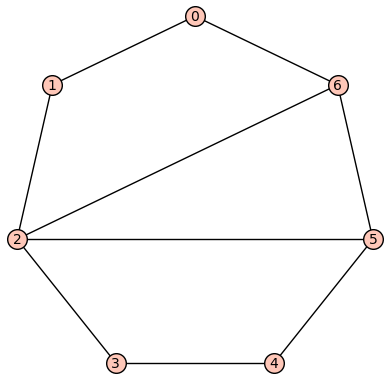

Graph 9:


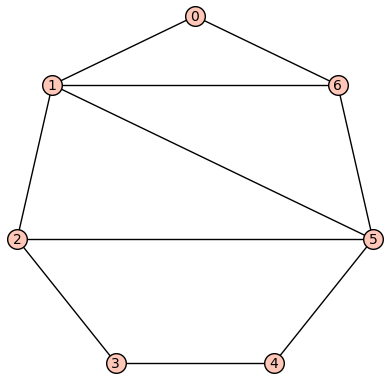

Graph 10:


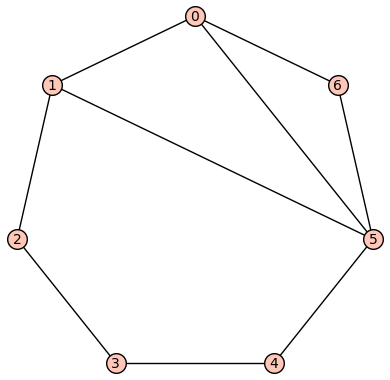

Graph 11:


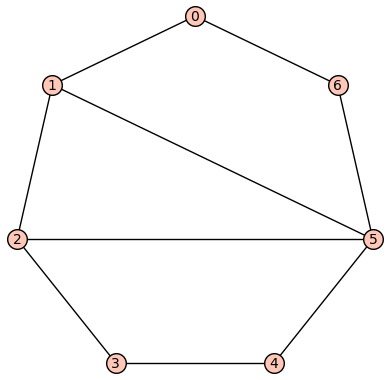

Graph 12:


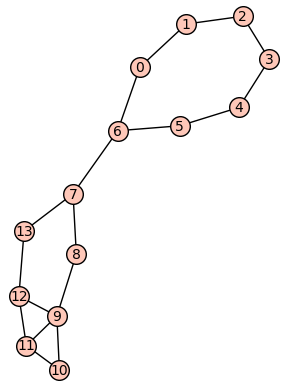

Graph 13:


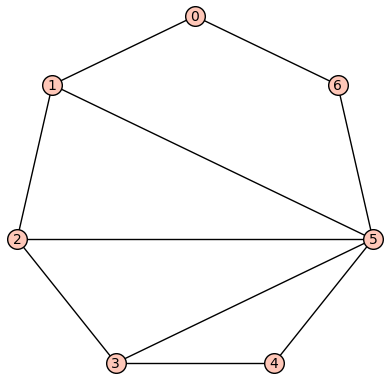

Graph 14:


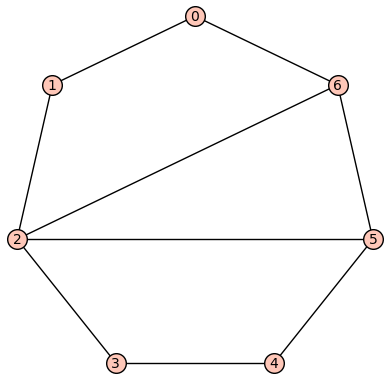

Graph 15:


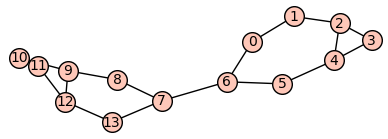

Graph 16:


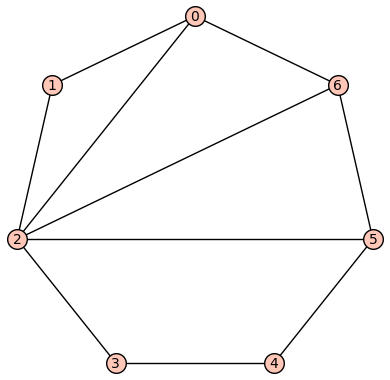

Graph 17:


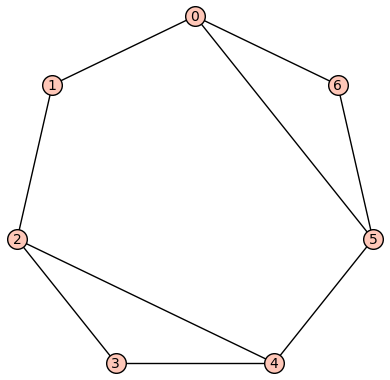

Graph 18:


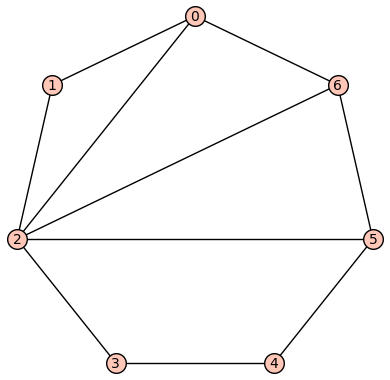

Graph 19:


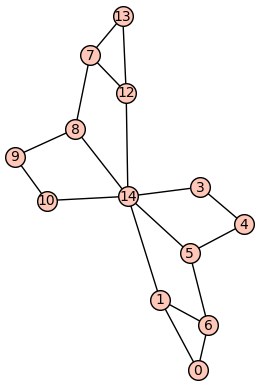

Graph 20:


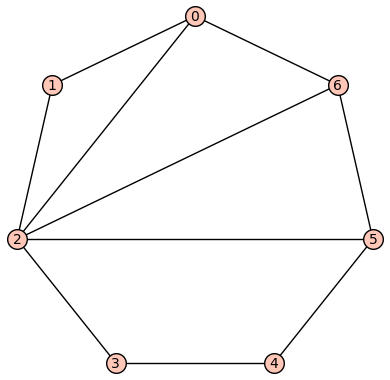

Graph 21:


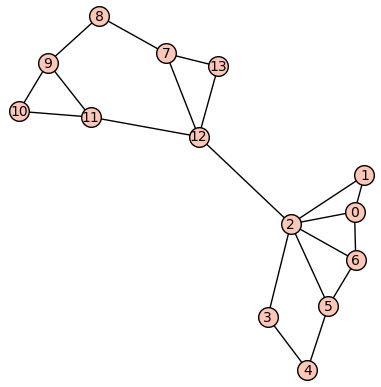

Graph 22:


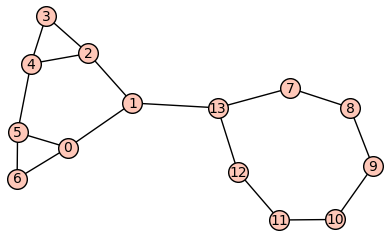

Graph 23:


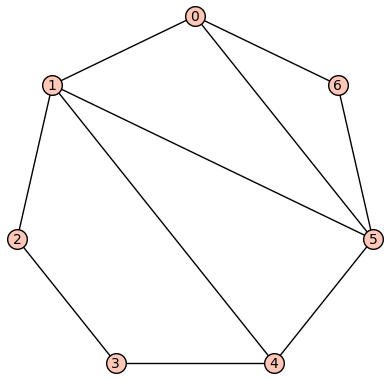

Graph 24:


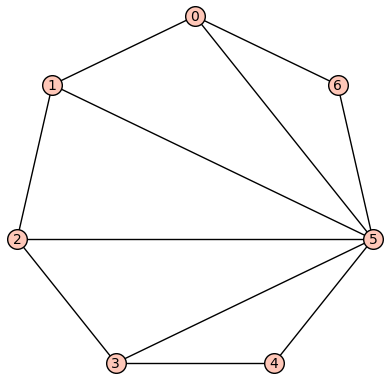

Graph 25:


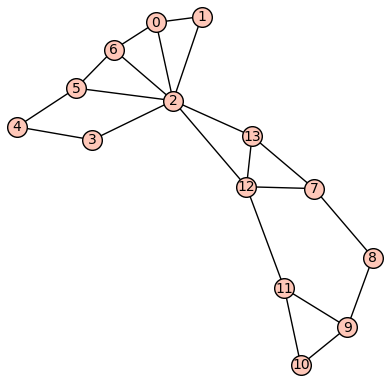

Graph 26:


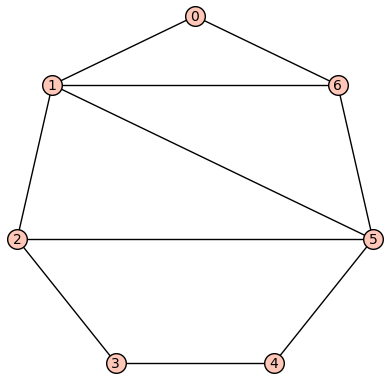

Graph 27:


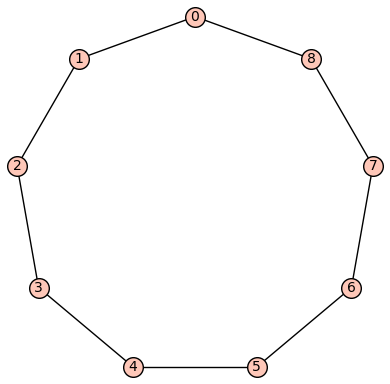

Graph 28:


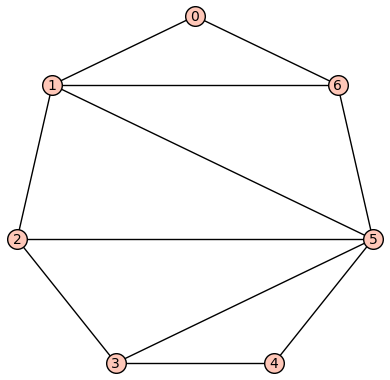

Graph 29:


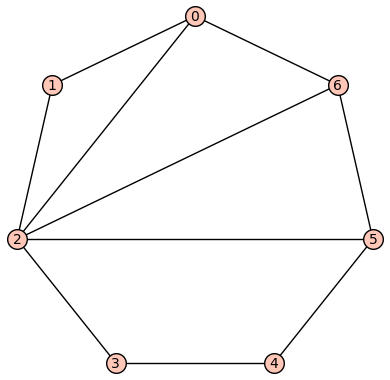

Graph 30:


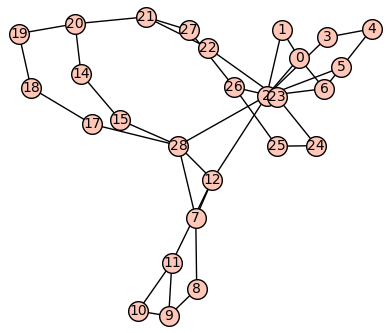

Graph 31:


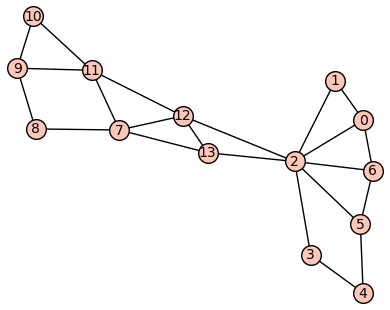

Graph 32:


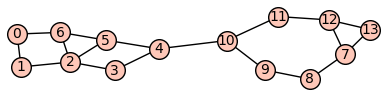

Graph 33:


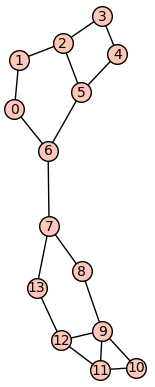

Graph 34:


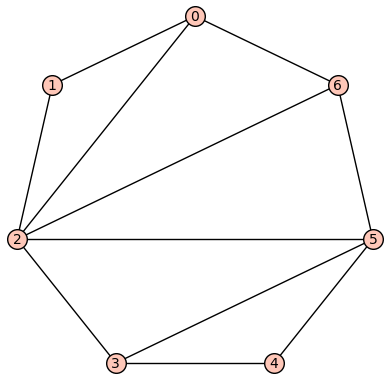

Graph 35:


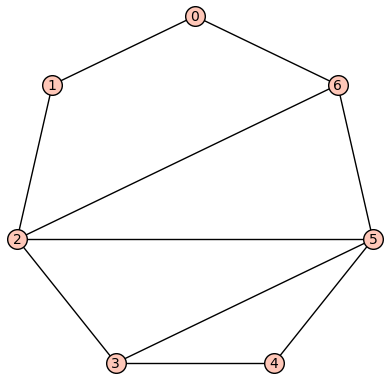

Graph 36:


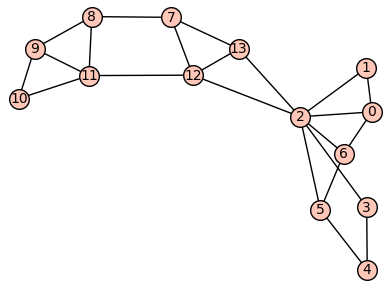

Graph 37:


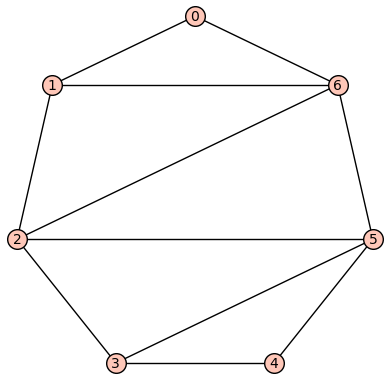

Graph 38:


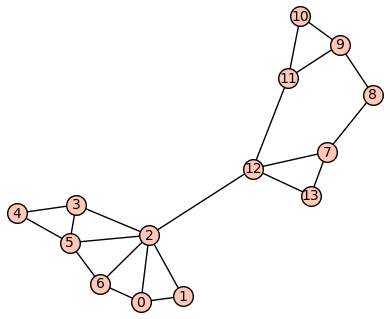

Graph 39:


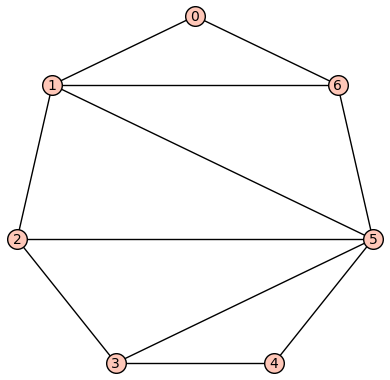

Graph 40:


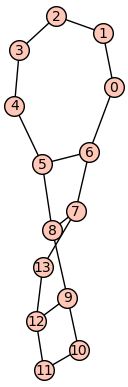

Graph 41:


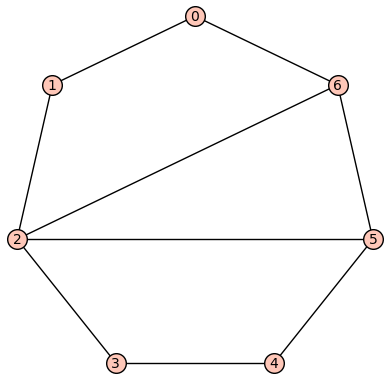

Graph 42:


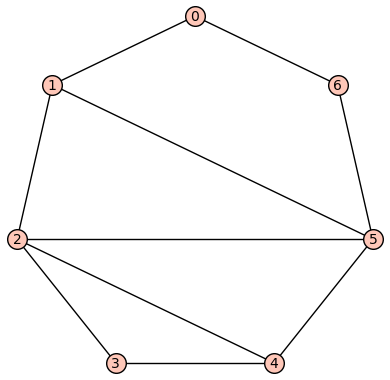

Graph 43:


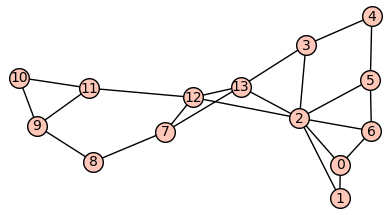

Graph 44:


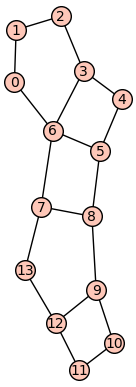

Graph 45:


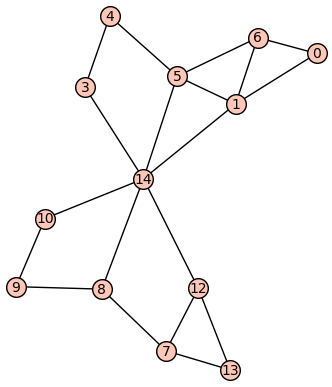

Graph 46:


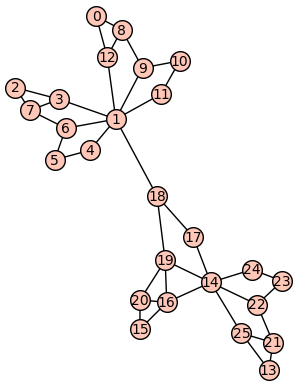

Graph 47:


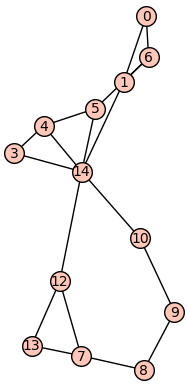

Graph 48:


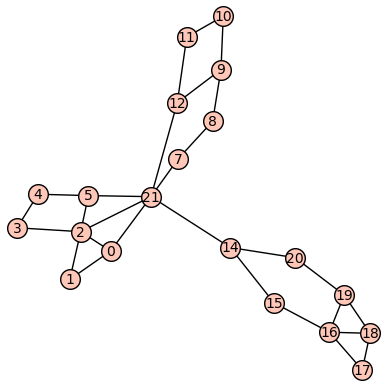

Graph 49:


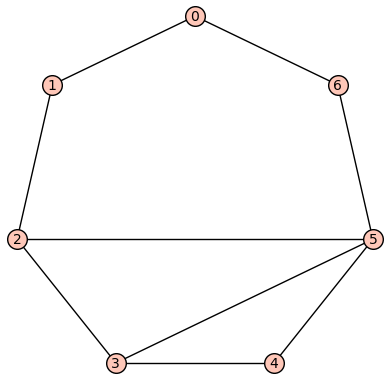

Graph 50:


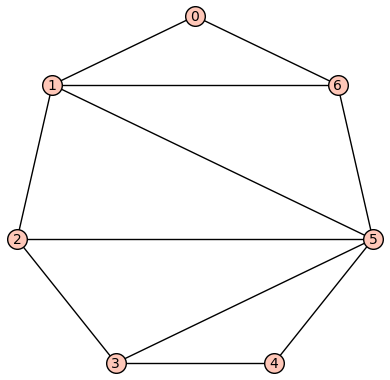

Graph 51:


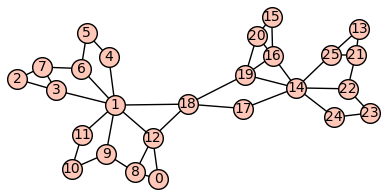

Graph 52:


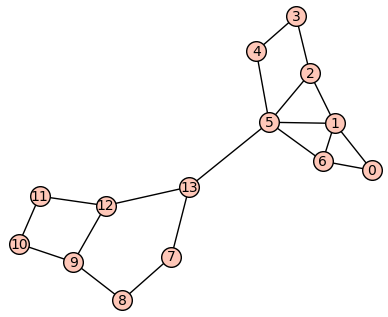

Graph 53:


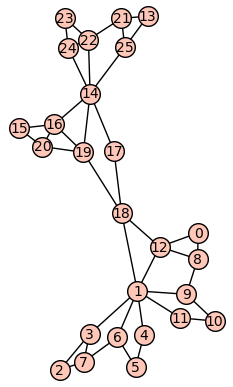

Graph 54:


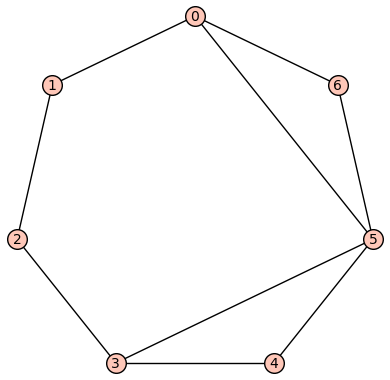

Graph 55:


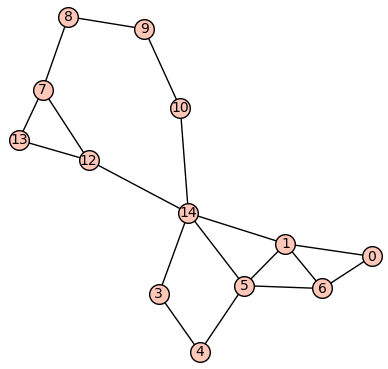

Graph 56:


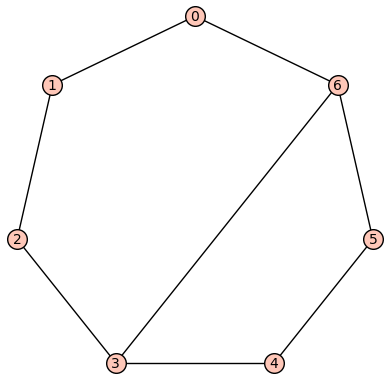

Graph 57:


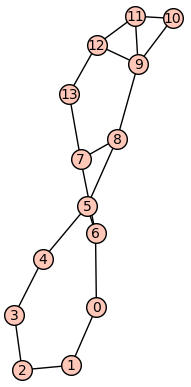

Graph 58:


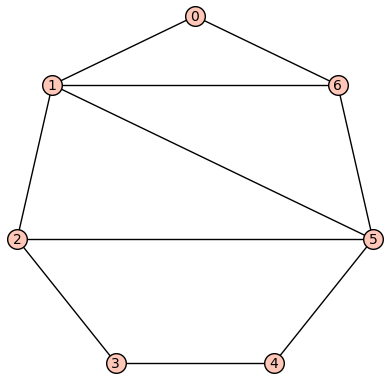

Graph 59:


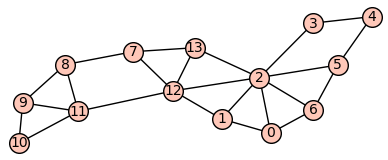

Graph 60:


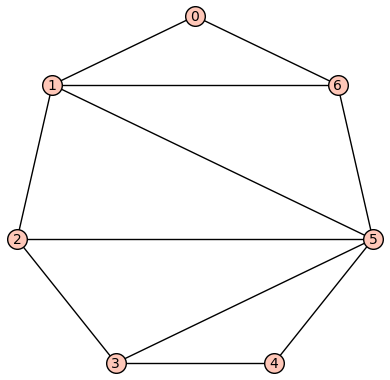

Graph 61:


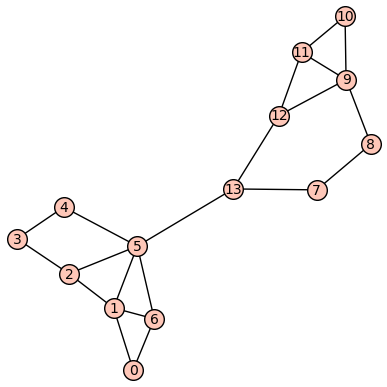

Graph 62:


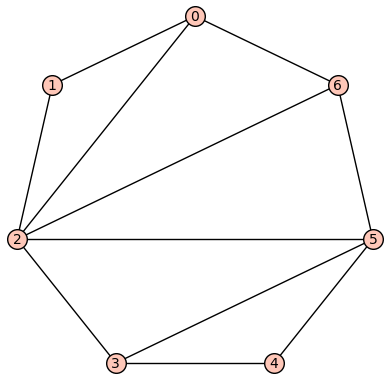

Graph 63:


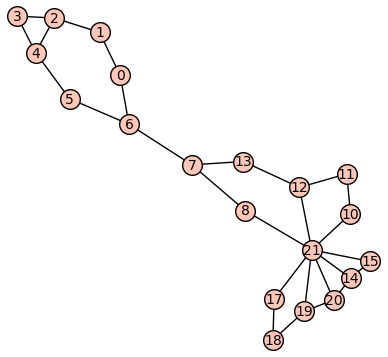

Graph 64:


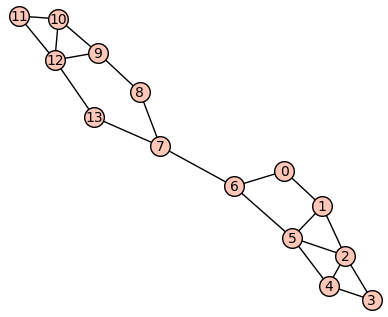

Graph 65:


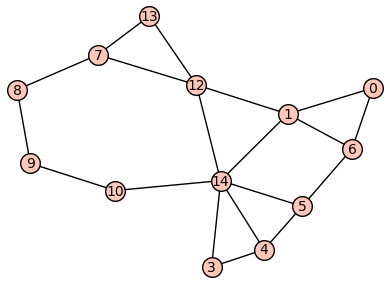

Graph 66:


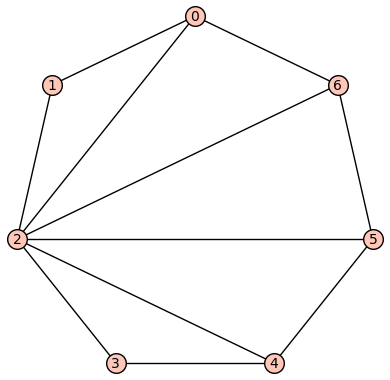

Graph 67:


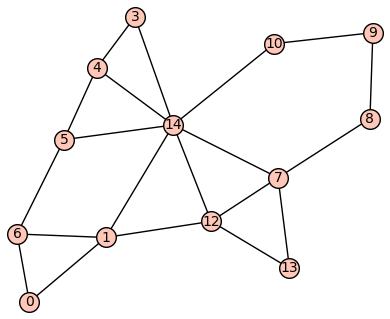

Graph 68:


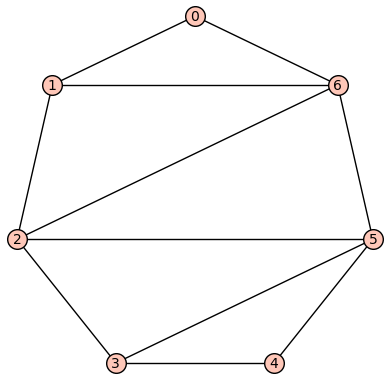

Graph 69:


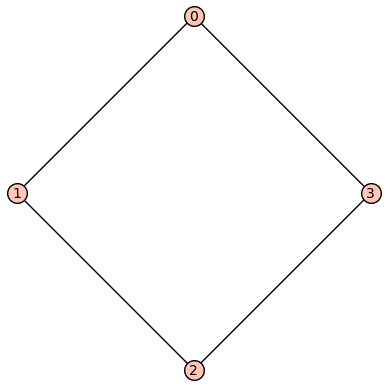

Graph 70:


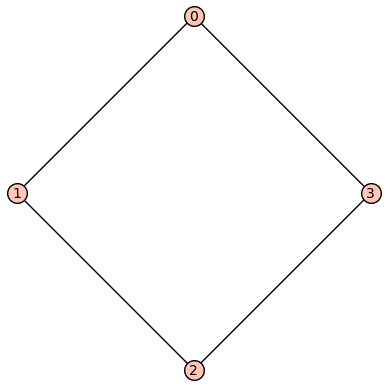

Graph 71:


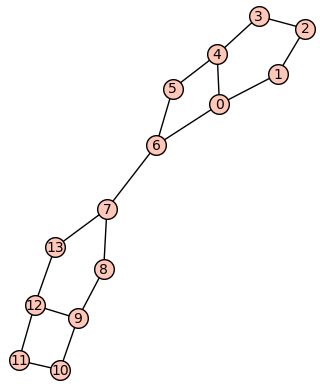

Graph 72:


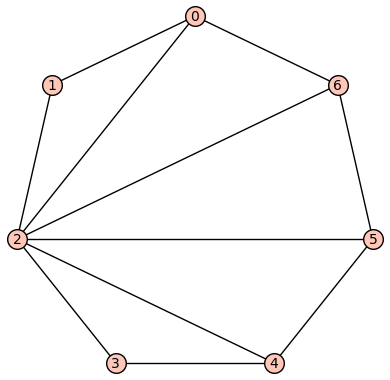

Graph 73:


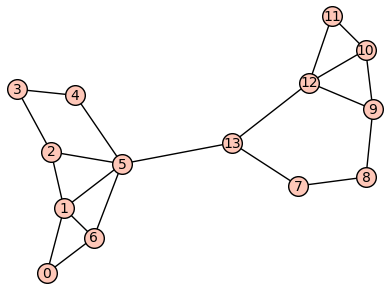

Graph 74:


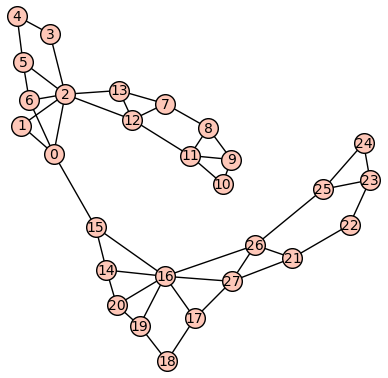

Graph 75:


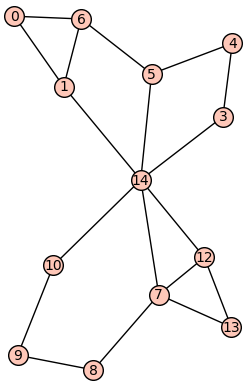

Graph 76:


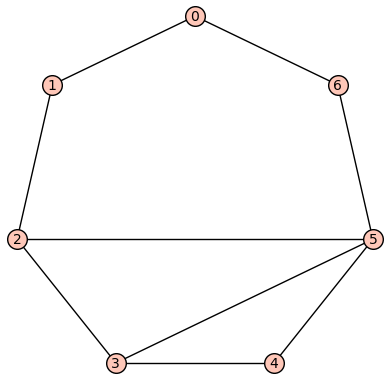

Graph 77:


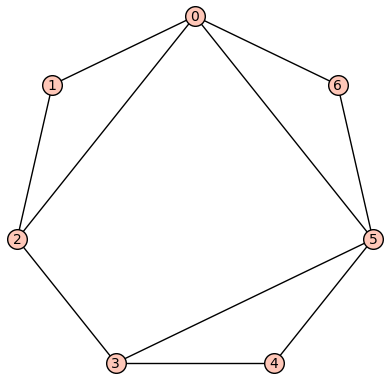

Graph 78:


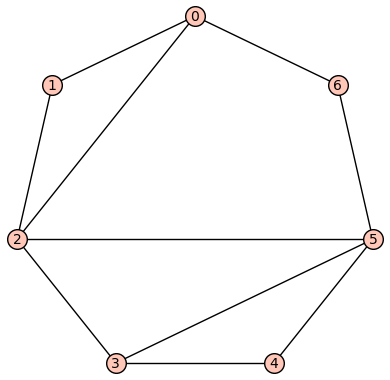

Graph 79:


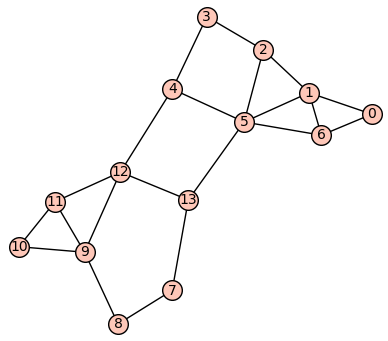

Graph 80:


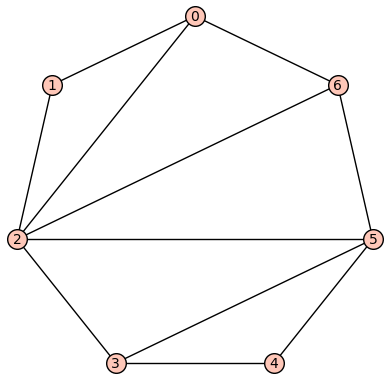

Graph 81:


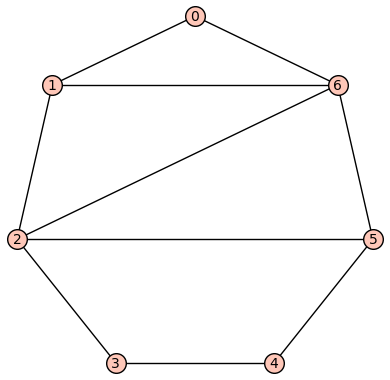

Graph 82:


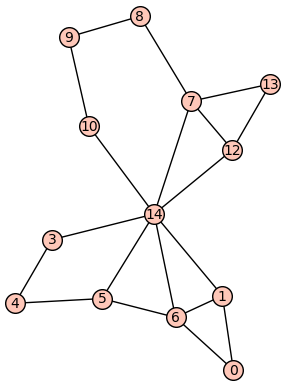

Graph 83:


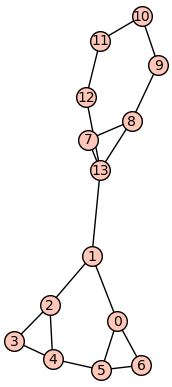

Graph 84:


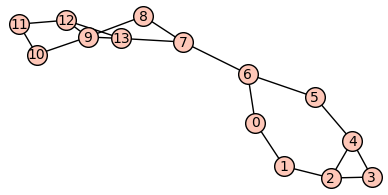

Graph 85:


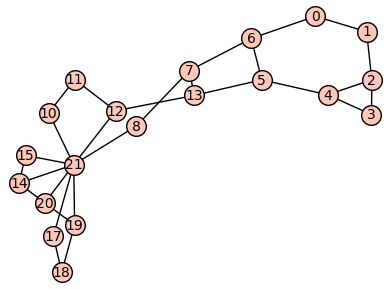

Graph 86:


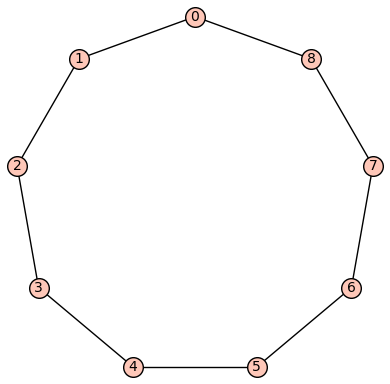

Graph 87:


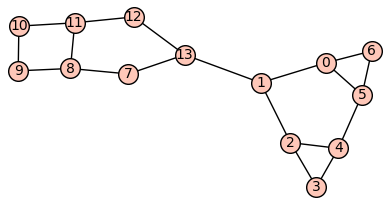

Graph 88:


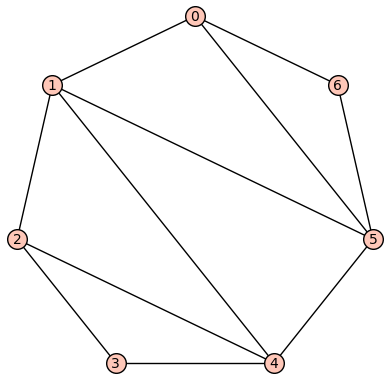

Graph 89:


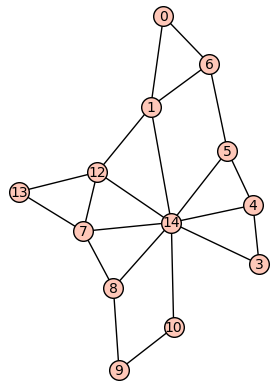

Graph 90:


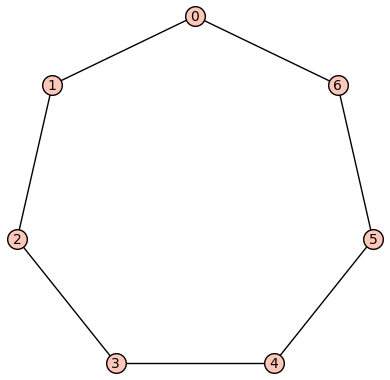

Graph 91:


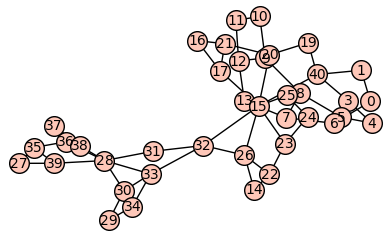

Graph 92:


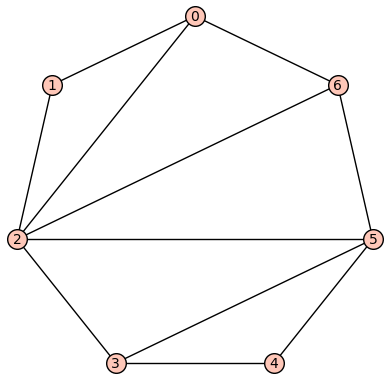

Graph 93:


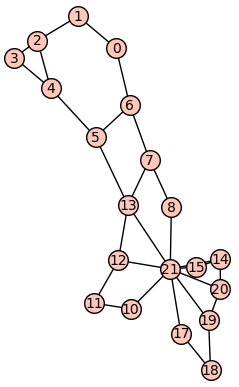

Graph 94:


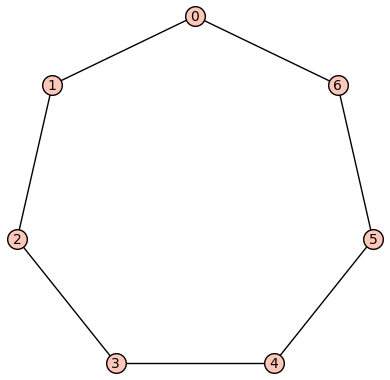

Graph 95:


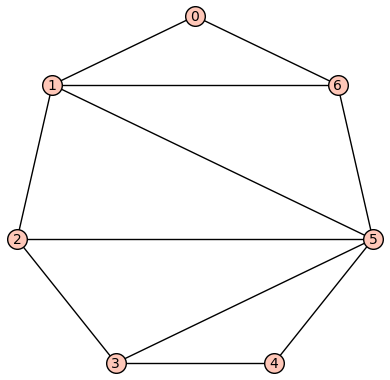

Graph 96:


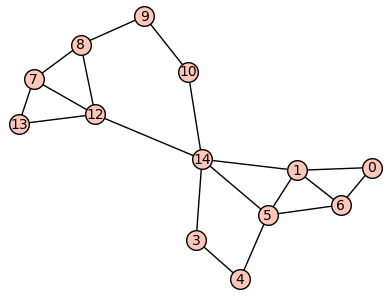

Graph 97:


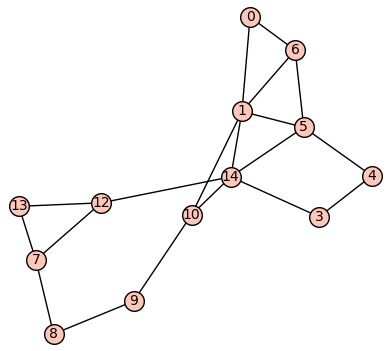

Graph 98:


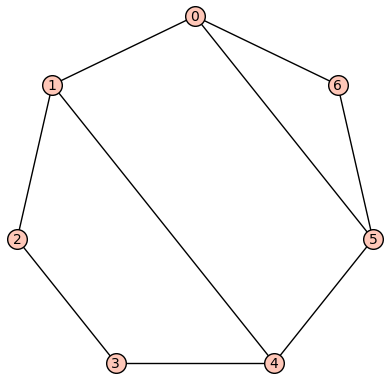

Graph 99:


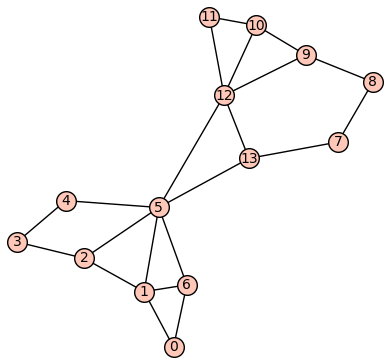

Graph 100:


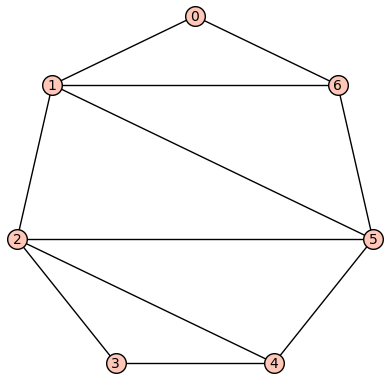

Graph 101:


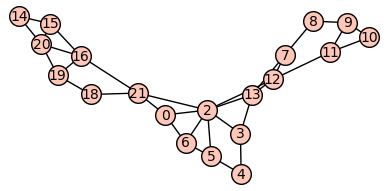

Graph 102:


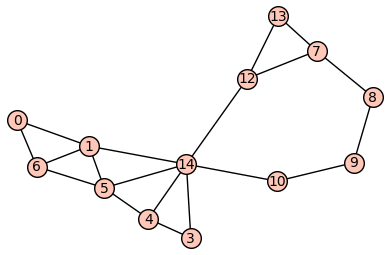

Graph 103:


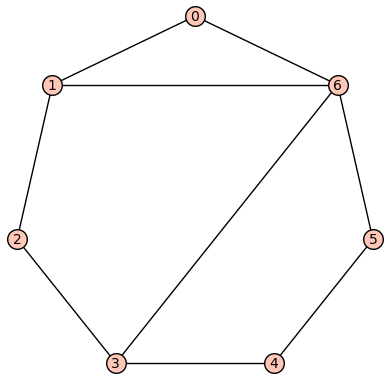

Graph 104:


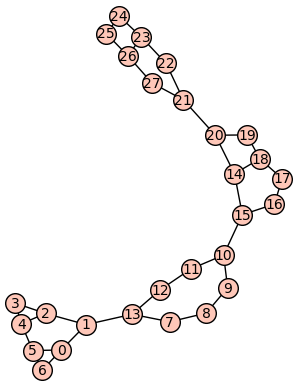

Graph 105:


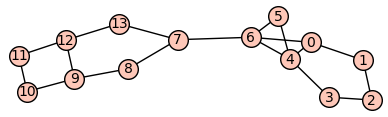

Graph 106:


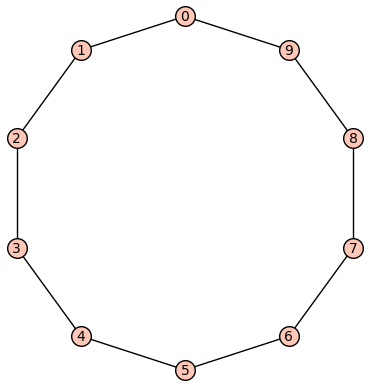

Graph 107:


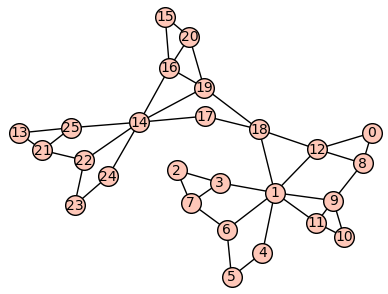

Graph 108:


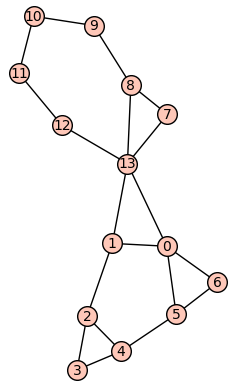

Graph 109:


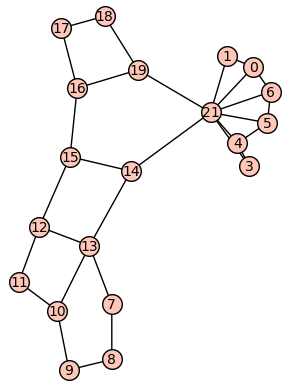

Graph 110:


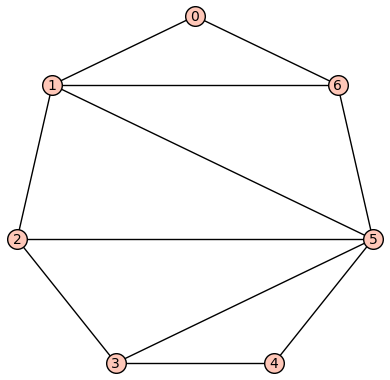

Graph 111:


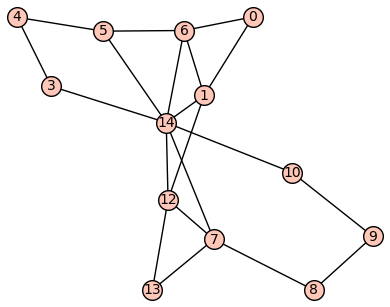

Graph 112:


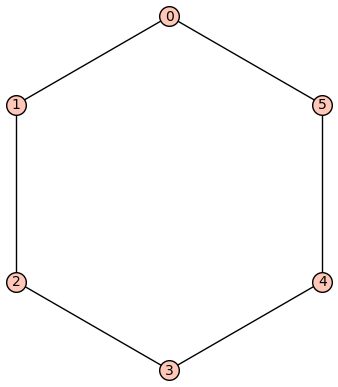

Graph 113:


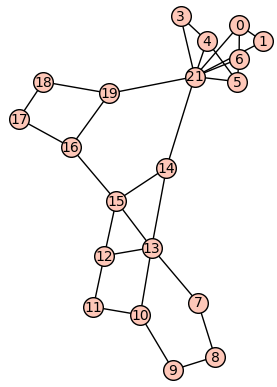

Graph 114:


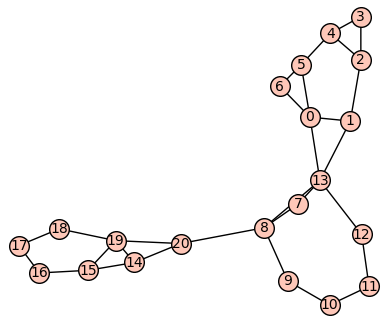

Graph 115:


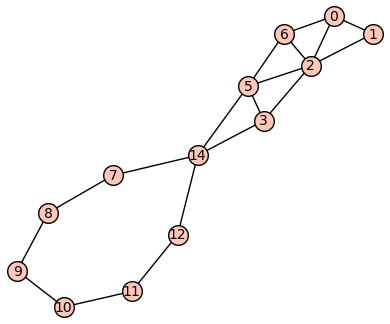

Graph 116:


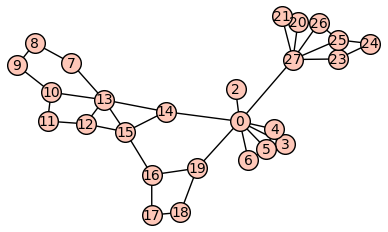

Graph 117:


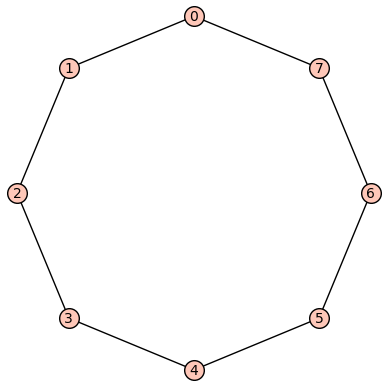

In [ ]:
import random
from sage.graphs.graph_generators import graphs

def generate_outerplanar_graphs(n, k, prob_choose_from_list, prob_add_edge, prob_join_graph, prob_connect_graph):
    outerplanar_graphs = []  # Seznam za shranjevanje generiranih grafov.
    i = 1  # Števec za izpis števila ponovitev.

    for _ in range(k):
        print(f"Iteration {i}")  # Izpis trenutne iteracije.
        i += 1
        
        if outerplanar_graphs and random.random() < prob_choose_from_list: # Naključno odločanje, ali bomo vzeli graf iz seznama ali ustvarili nov cikel in ga dodali v seznam.
            chosen_graph = random.choice(outerplanar_graphs).copy() # Izbere graf naključno iz seznama.
            operation_choice = random.random() # Naključno odločanje, ali bomo dodali povezavo, združili dva grafa ali ju povezali z eno povezavo.

            if operation_choice < prob_add_edge:
                # Doda povezavo med dvema nepovezanima vozliščema, brez sekanja povezav.
                vertices = list(chosen_graph.vertices()) 
                added_edge = False
                for _ in range(len(vertices)**2):  # Omejitev števila poskusov.
                    u, v = random.sample(vertices, 2)
                    if not chosen_graph.has_edge(u, v):
                        new_graph = chosen_graph.copy()
                        new_graph.add_edge(u, v)
                        if new_graph.is_circular_planar():  # Preveri, ali je dobljen graf zunanjeravninski.
                            chosen_graph = new_graph
                            added_edge = True
                            break
                if not added_edge:
                    continue  # Če ni dodana nova povezava, nadaljuje z naslednjo iteracijo.

            elif operation_choice < prob_add_edge + prob_join_graph:
                # Združi dva grafa tako, da ju združi s skupnim vozliščem.
                other_graph = random.choice(outerplanar_graphs).copy()  # Izbere drug graf za združitev.
                if chosen_graph == other_graph:
                    continue  # Preskoči, če sta izbrana grafa ista.
                    
                u = random.choice(list(chosen_graph.vertices())) # Izbere naključni vozlišč iz obeh grafov.
                v = random.choice(list(other_graph.vertices()))

                new_graph = chosen_graph.disjoint_union(other_graph)  # Združi dva grafa tako, da nista povezana.
                new_graph.relabel() # Graf na novo označi.

                v_adjusted = v + len(chosen_graph.vertices()) # Prilagodi indeks za vozlišče v drugem grafu po združitvi.

                merged_vertex = max(new_graph.vertices()) + 1  # Doda povezave za novo vozlišče.
                new_graph.add_vertex(merged_vertex)

                u_neighbors = list(chosen_graph.neighbors(u))
                v_neighbors = list(other_graph.neighbors(v))

                for neighbor in u_neighbors:
                    new_graph.add_edge(merged_vertex, neighbor)

                for neighbor in v_neighbors:
                    adjusted_neighbor = neighbor + len(chosen_graph.vertices()) # Prilagodi sosedovo vozlišče glede na združeni graf.
                    if merged_vertex != adjusted_neighbor:  # Izogiba se samopovezavam.
                        new_graph.add_edge(merged_vertex, adjusted_neighbor)

                if u in new_graph: # Odstrani izvorna vozlišča "u" in "v" in njune povezave.
                    new_graph.delete_vertex(u)

                if v_adjusted in new_graph:
                    new_graph.delete_vertex(v_adjusted)

                if new_graph.is_circular_planar():  # Preveri, ali graf ostaja zunanjeravninski.
                    chosen_graph = new_graph

            elif operation_choice < prob_add_edge + prob_join_graph + prob_connect_graph: # Poveže dva grafa z eno naključno povezavo.
                other_graph = random.choice(outerplanar_graphs).copy()  # Izbere drug graf iz seznama.
                if chosen_graph == other_graph:
                    continue  # Preskoči, če sta izbrana grafa ista.

                new_graph = chosen_graph.disjoint_union(other_graph)  # Združi oba grafa v disjunktno unijo.
                new_graph.relabel()  # Graf preimenuje vozlišča, da se ohrani enoličnost.

                u = random.choice(list(chosen_graph.vertices()))  # Izbere naključno vozlišče iz prvega grafa.
                v = random.choice(list(other_graph.vertices()))  # Izbere naključno vozlišče iz drugega grafa.
                v_adjusted = v + len(chosen_graph.vertices())  # Prilagodi indeks vozlišča iz drugega grafa.

                new_graph.add_edge(u, v_adjusted)  # Doda povezavo med naključnima vozliščema.

                if new_graph.is_circular_planar():  # Preveri, ali graf ostaja zunanjeravninski.
                    chosen_graph = new_graph

            outerplanar_graphs.append(chosen_graph) # Doda dobljeni graf v seznam.

        else:
            cycle_size = random.randint(3, n)  # Ustvari nov cikel in ga doda v seznam.
            new_cycle = graphs.CycleGraph(cycle_size)
            outerplanar_graphs.append(new_cycle)

    return outerplanar_graphs

# Parameters
n = 10  
k = 1000
prob_choose_from_list = 0.90 
prob_add_edge = 0.80  # Verjetnost za dodajanje povezave.
prob_join_graph = 0.10  # Verjetnost za združitev grafov.
prob_connect_graph = 0.10  # Verjetnost za povezovanje grafov z eno naključno povezavo.

# Generate the graphs.
outerplanar_graphs = generate_outerplanar_graphs(n, k, prob_choose_from_list, prob_add_edge, prob_join_graph, prob_connect_graph)

# Display the graphs.
for i, graph in enumerate(outerplanar_graphs):
    print(f"Graph {i + 1}:")
    graph.show()
